# **5. Histogram Modeling**

In [1]:
from configs.config import BASE_PATH
from matplotlib import pyplot as plt
import imageio
import numpy as np
import cv2
import os

path = os.path.join(BASE_PATH,"data","image",'opencv_image5.jpg')
img_gray = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
img = cv2.imread(path,cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# **1. Histogram Equalization**
* 히스토그램의 빈도를 기반으로 이미지를 처리하여 특정 구간에 밝기 분포가 몰려있는 이미지에 대해 잘 동작한다.

* 히스토그램 빈도가 높은 구간의 값들을 낮은 구간으로 나누어준다.

* 이 과정에서 특정 밝기에 몰아서 주고, 빈도가 높은 곳은 간격이 넓어지기 때문에 이미지가 부드럽게 처리되지 않는다.

* 또한, RGB Channel에서는 각 채널이 독립적이기 때문에 각 채널에 Hist EQ를 진행해주면 이미지가 뭉개질 수 있다.

* 이러한 부분을 해결하기 위해 YCbCr로 변환 후, 밝기 Y채널에서만 Hist EQ를 진행한다.

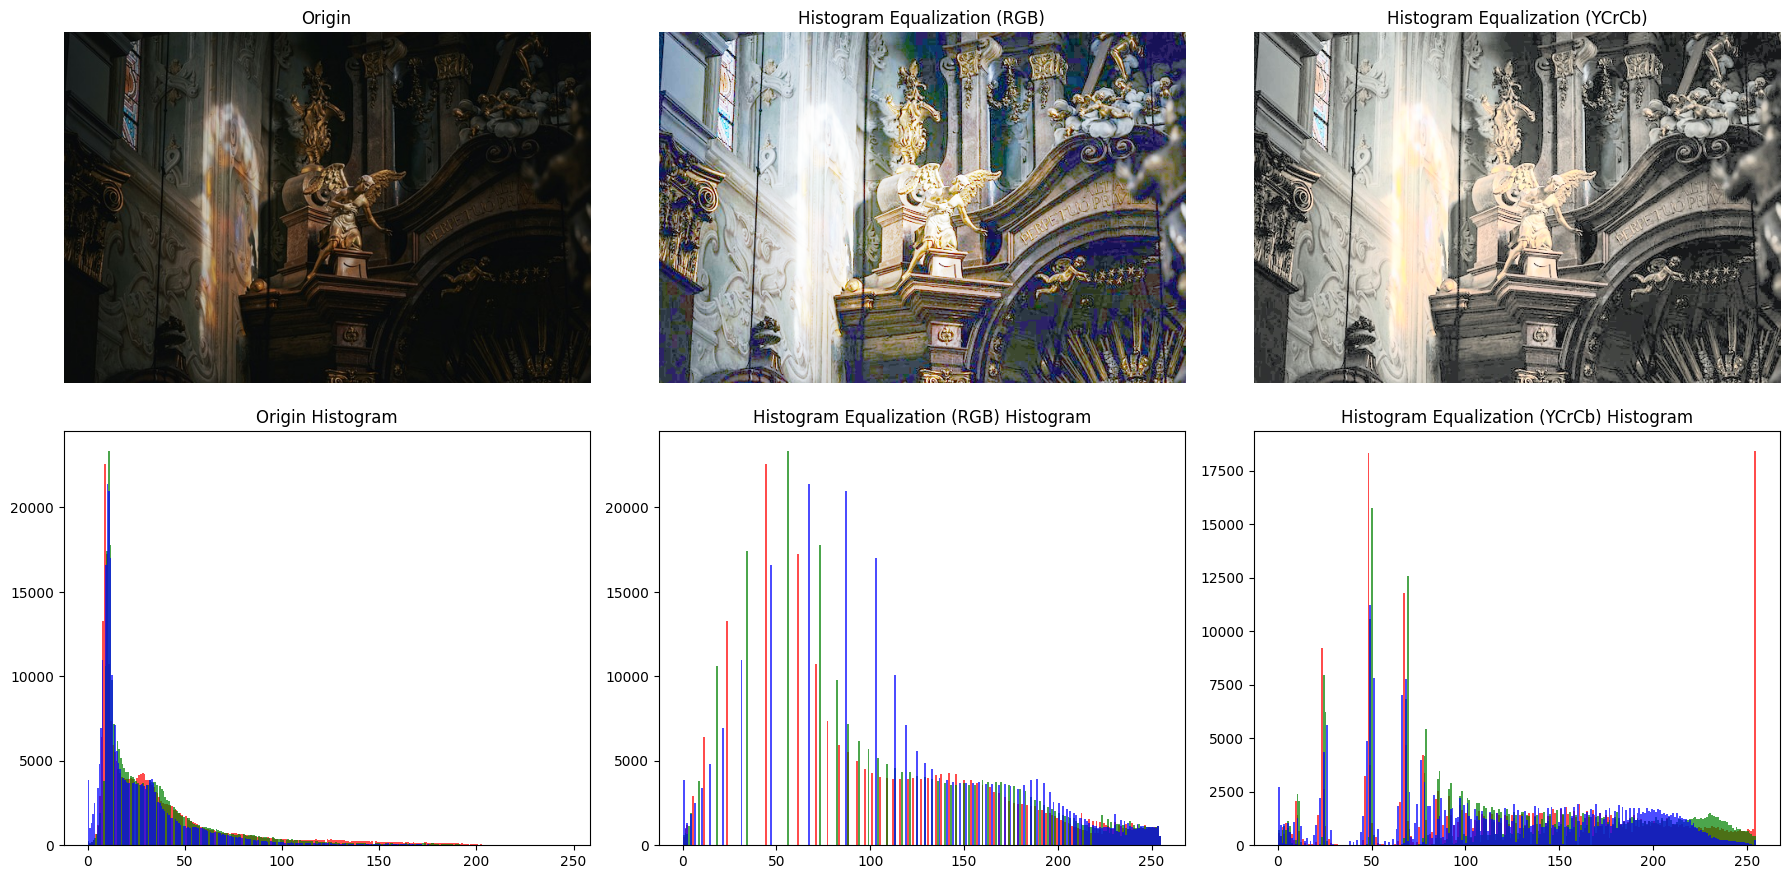

In [2]:
img_rgb_eq = cv2.merge([cv2.equalizeHist(img[:,:,i]) for i in range(3)])

img_ycrcb = cv2.cvtColor(img,cv2.COLOR_RGB2YCrCb)
y,cr,cb = cv2.split(img_ycrcb)
img_ycrcb_eq = cv2.merge([cv2.equalizeHist(y), cr, cb])
img_ycrcb_eq = cv2.cvtColor(img_ycrcb_eq, cv2.COLOR_YCrCb2RGB)

images = [img, img_rgb_eq, img_ycrcb_eq]
titles = ['Origin', 'Histogram Equalization (RGB)', 'Histogram Equalization (YCrCb)']
colors = ['r','g','b']

fig, ax = plt.subplots(2,3,figsize=(18,9))

for i in range(3):
    ax[0,i].imshow(images[i])
    ax[0,i].set_title(titles[i])
    ax[0,i].axis('off')

    for j in range(3):
        ax[1,i].hist(images[i][:,:,j].flatten(), bins=256, color=colors[j], alpha=0.7)
    ax[1,i].set_title(f'{titles[i]} Histogram')

plt.tight_layout()
plt.show()

* RGB의 경우, 좌측 하단에 암부 표현이 다소 부자연스러운 것을 확인할 수 있다.

* YCbCr의 경우 몰려있던 분포가 고르게 퍼진 것을 확인할 수 있다.

* 결과를 보면 알 수 있듯이, Image Enhancement의 한 종류이지만 항상 더 나은 결과를 보장하는 것은 아니다.

## **2. Histogram Stretching**

* 히스토그램의 모양은 유지한 채, 이미지의 밝기 값을 특정 구간에 매핑 시키는 기법이다.


In [3]:
path = os.path.join(BASE_PATH,"data","image",'opencv_image5.jpg')
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
img_ycrcb = cv2.cvtColor(img,cv2.COLOR_RGB2YCrCb)

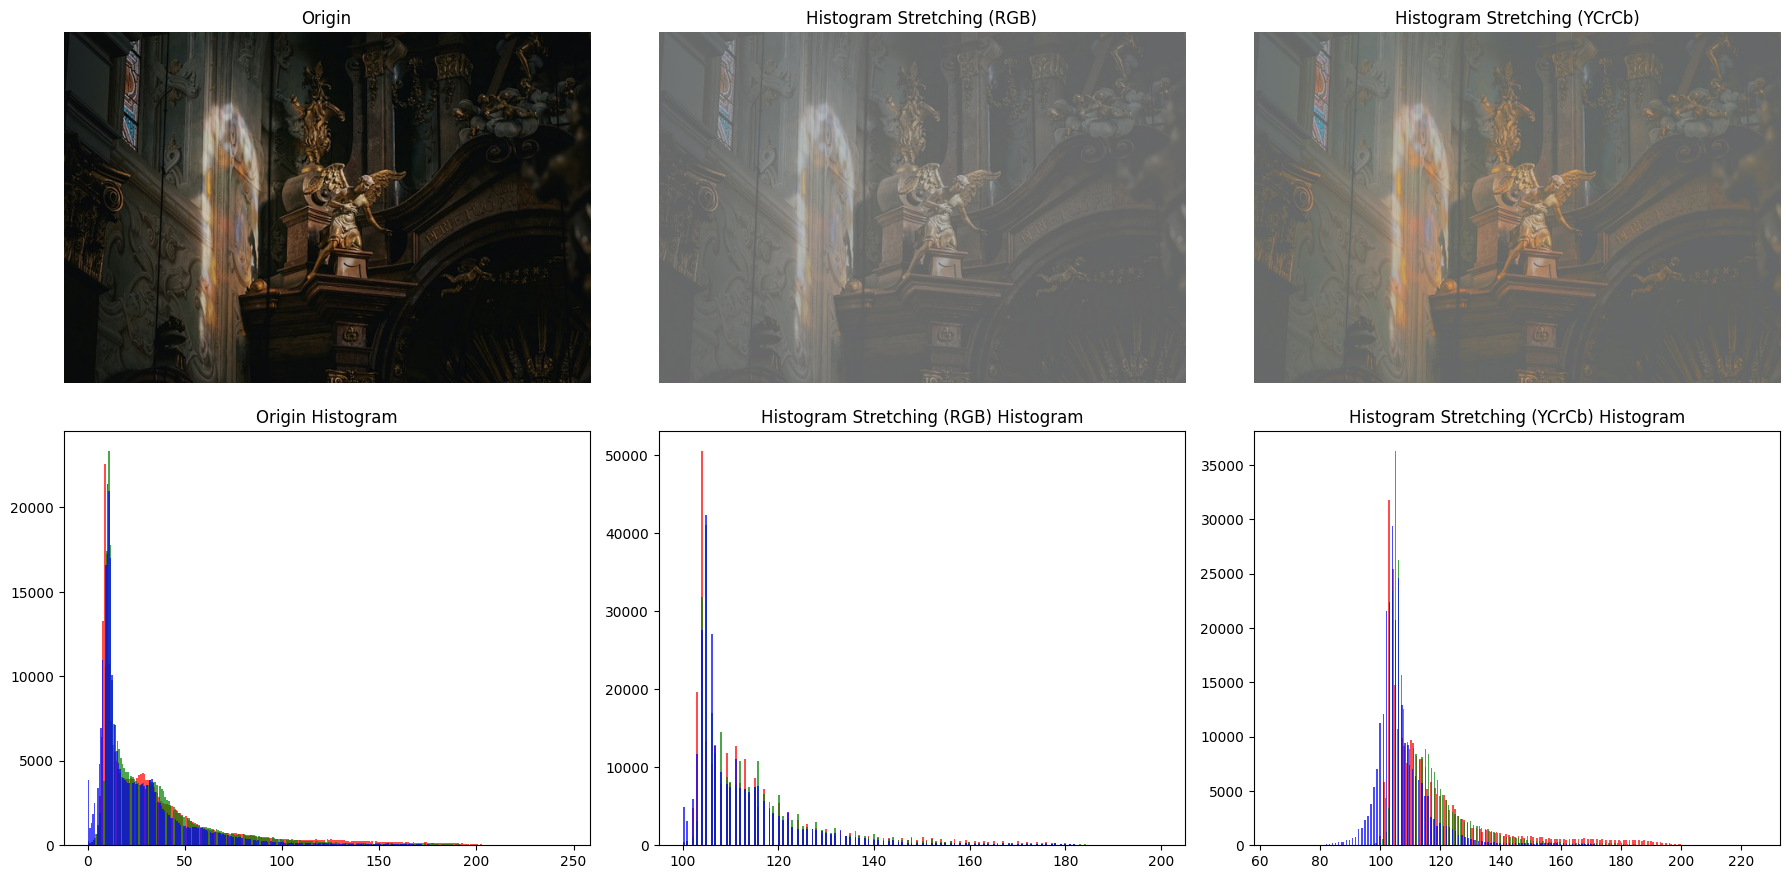

In [4]:
img_rgb_st = cv2.merge([cv2.normalize(img[:,:,i],None, 100, 200, cv2.NORM_MINMAX) for i in range(3)])

img_ycrcb = cv2.cvtColor(img,cv2.COLOR_RGB2YCrCb)
y,cr,cb = cv2.split(img_ycrcb)
img_ycrcb_st = cv2.merge([cv2.normalize(y,None, 100, 200, cv2.NORM_MINMAX), cr, cb])
img_ycrcb_st = cv2.cvtColor(img_ycrcb_st, cv2.COLOR_YCrCb2RGB)


images = [img, img_rgb_st, img_ycrcb_st]
titles = ['Origin', 'Histogram Stretching (RGB)', 'Histogram Stretching (YCrCb)']
colors = ['r','g','b']

fig, ax = plt.subplots(2,3,figsize=(18,9))

for i in range(3):
    ax[0,i].imshow(images[i])
    ax[0,i].set_title(titles[i])
    ax[0,i].axis('off')

    for j in range(3):
        ax[1,i].hist(images[i][:,:,j].flatten(), bins=256, color=colors[j], alpha=0.7)
    ax[1,i].set_title(f'{titles[i]} Histogram')

plt.tight_layout()
plt.show()

* 원본 사진이 이미 히스토그램 분포 자체가 잘 되있어서 스트레칭 의미가 없는 사진이라 [100,200] 구간에 매핑시켰다.

* RGB의 경우 사진의 밝기가 밝아져서 흰색의 이미지에 가깝게 됐다.

* YCbCr의 경우, 변환 과정에서 밝기가 조금씩 변환돼서 색감이나 밝기가 조금 달라진 것을 확인할 수 있다.